# The Data Science on U.S. Stock Returns with Python Programming




# Abstract

What drives U.S. Equity Returns? Are there any characteristics that explain the differences in stock returns? Regardless of the time period, can good features illustrate the nature of stock prices? 

For this project, I used multiple linear regression, cross validation, class imbalance, narrative analytics coupled with data visualization. In the domain of supervised learning in data science, where models have a known outcome such as stock market returns, I build the case for the small value company narrative.  I, also address the issue of overfitting for the performance of six portfolios from July 1926 to June 2018, on a monthly frequency, against the three independent drivers of stock returns. The end result is a dominant analytical narrative of the U.S. Stock Market with a small value company tilt.

# Introduction

People in the financial markets have long been interested on the background of stock prices. Colloquial and academic theories rise and fall, like stock prices over decades of observations. Progress has been made first with better data, then financial knowledge followed by the science of statistics. Only testable explanations can shed light on the viable understanding on how U.S. stock markets work. Explanations without testing, sooner or later, lead to impracticality with a financial loss. Many scholars and practitioners have been selecting and examining various features, with various test results on the nature of stock market returns. Sometimes beliefs on the stock market do not change with good statistical tests that claim otherwise. Or good intuition on the nature of the stock market have no test results. Nonetheless, there is only one narrative analytics that dominates above the rest.

In 2013, Eugene Fama of the University of Chicago, received the Nobel Memorial Prize in Economic Sciences for his life’s work on financial economics. Together with Kenneth French, who was also at the University of Chicago at the time, wrote a seminal research paper on stock market returns in 1993. The Fama – French Three – Factor Model with strong scientific evidence coupled with an outstanding data set used a multiple linear regression model to explain the nature of stock market returns. Beyond awards, the research paper is one of the most cited research papers in all of academia, i.e. the top 5% of the many thousands according to the reputable Social Science Research Network. Both Fama and French have facilitated the fecundity of feature based investing in the field of financial econometrics. Many academics and professionals in the financial services industry have used the foundation of their model to understand the rates of return in the stock market and have expanded or even altered the features to other products in the financial markets.

# Data Selection, Feature Engineering and Bias

Unlike many other business sectors, the financial services industry and its financial data is widely available because there are financial incentives to invest. The free and commercial publishing of stock market information has been around for decades, if not a century, which eases data selection for data scientists. If there are any data discrepancies, gaps or limitations, then there are resources for a remedy funded by financial institutions. Before the formal job title of a Data Engineer, and orginally beginning in 1962, the Center for Research on Security Prices (CRSP) at the University of Chicago have a strong historical stock data set. Originally academic with some help of government and commmericial interests over the decades, the data integrity and the data reliabliity of CRSP, was driven primarily by the financial incentives to invest in the U.S. Stock Market.

However, like with all data selection, there can be biases and one in particular required great care to be removed in the initial years, according to CRSP. Survivorship bias, a type of selection bias, is the proclivity of removing failed companies to potentially skew results because of a lack of resources or even a deliberate action to validate a narrative of the U.S. Stock Market. Specially, as we shall see later below, small companies rather than larger companies have great significance in U.S. Stock Market returns. The economics of competition, the business of mismanagement, running out of cash financially are just a few reasons why small companies fail. Officially, the U.S. Bureau of Labor Statistics in March of 2017 claims 20% of small business fail in the first year and 50% fail in the fifth year. Although, the majority of companies in the U.S. are not public because of associated costs and risk of business regulations, this theme of small company capture in data sets played an important role for devleloping relevant narrative analytics.

Beyond selection bias, reliable and consistently delivered data on publicly disclosed companies with transparent pricing on open financial markets, like the New York Stock Exchange (NYSE), one component source of CRSP, gives all observers plenty of cross validation. Trust in the data led researchers to surmise features based on their narratives of the U.S. stock market and therefore different types of Feature Engineering arose. Exogenous Feature Engineering on the investing in global oil production and prices through the representation of U.S. Oil company stocks. Endogenous Feature Engineering on company news acquring another company. Many frameworks engineered features of stock returns on their narrative analytics or data driven story telling.  Nonetheless, this leads us to the most successful narrative analytics of the returns in the U.S. stock market.

# The Model

The features that Eugene Fama and Kenneth French chose to explain U.S. stock returns were the internal attributes of size and style of individual companies along with the overall clustering effect of the market. The narrative on what is the cause of U.S. stock market returns is risk, which is generally defined as the chance that something can lose value. Specifically, the sensitivies of the market, value style and small size are the explanatory or independent variables that drive the U.S. stock market. On the other hand, the dependent variable, or portfolio returns are subtracted by a risk free return or the 90 U.S. Treasury Bill to focus on the excess return above a risk free alternative.

The market risk factor is the quantity of exposure an investor may have to the entire U.S. Stock Market over the risk free investment of a T – Bill.

The size risk factor is the return of low capitalized companies over the return of large capitalized companies. Specifically, the average return of the bottom 30% of companies over the average return of the top 30% (Keep or Remove this sentence) Smaller companies have less departments to absorb the impacts of business risks and less financial capacity compared to large companies.

The value risk factor is the low price stock exposure or stocks with high book – to – market ratios that are undervalued. To elaborate, value is a financial metric made of components like book value and market value. What a company has in assets with what it owes in liabilities is the net worth or book value. The value of future earnings of the company are not considered as book value is a snapshot of current assets minus liabilities. Separately, market value is a price adjusted quantity available in the financial market or the price per tradeable share times the number of tradeable shares outstanding. Similar to the price square foot in real estate, market value is the price market participants will buy or sell a product in a market. Supply and demand drives market value like a vote for value. Altogether, the book value is the numerator of the ratio and market value is the denominator. Value stocks have greater book values than market values so high book – to – market ratios.

In [30]:
import math
import warnings
from colorama import Fore

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [31]:
# Load the file for analysis and view columns

df = pd.read_csv('/Users/lacivert/3/ff3f.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['Month',
 'Mkt-RF',
 'SMB',
 'HML',
 'SMALL LoBM-RF',
 'ME1 BM2-RF',
 'SMALL HiBM-RF',
 'BIG LoBM-RF',
 'ME2 BM2-RF',
 'BIG HiBM-RF']

In [32]:
# Assign the variables for analysis

# Time
month = df.loc[:,'Month']

# independent factors 
market_return, small_vs_big, value_vs_growth = df.loc[:,'Mkt-RF'], df.loc[:,'SMB'], df.loc[:,'HML']

# dependent factors on small companies across style
small_growth_excess_return, small_neutral_excess_return = df.loc[:,'SMALL LoBM-RF'], df.loc[:,'ME1 BM2-RF']

small_value_excess_return = df.loc[:,'SMALL HiBM-RF']   

# dependent factors on large companies across style 
large_growth_excess_return, large_neutral_excess_return = df.loc[:,'BIG LoBM-RF'], df.loc[:,'ME2 BM2-RF']

large_value_excess_return = df.loc[:,'BIG HiBM-RF']

In [33]:
# Sanity check for length
len(month), len(market_return), len(small_vs_big), len(value_vs_growth),len(small_growth_excess_return), len(small_neutral_excess_return), len(small_value_excess_return),len(large_growth_excess_return), len(large_neutral_excess_return), len(large_value_excess_return)

(1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104)

In [34]:
# Subset of Inpendent Variables

three = [market_return, small_vs_big, value_vs_growth]

df_three = pd.DataFrame(data=three)

df_three.reset_index()

df_independent_factors = df_three.transpose()

df_independent_factors.rename (columns={'Mkt-RF' : 'Market_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'SMB' : 'Size_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'HML' : 'Style_Risk_Factor'}, inplace=True)

df_independent_factors.describe()

,Market_Risk_Factor,Size_Risk_Factor,Style_Risk_Factor
count,1104.000,1104.000,1104.000
mean,0.662,0.216,0.373
std,5.332,3.200,3.490
min,-29.130,-17.280,-13.280
25%,-1.970,-1.560,-1.305
50%,1.015,0.080,0.155
75%,3.635,1.745,1.732
max,38.850,36.700,35.460


# Correlation Matrix of Independent Factors

A relevant and robust model would have explanatory factors that are independent of each other so each feature can explain their effect on the U.S. Stock Market without interference. The near zero figures below add explanatory value of U.S. stock market returns as each contribute the nature of the U.S. stock market.

Text(0.5,1,'Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018')

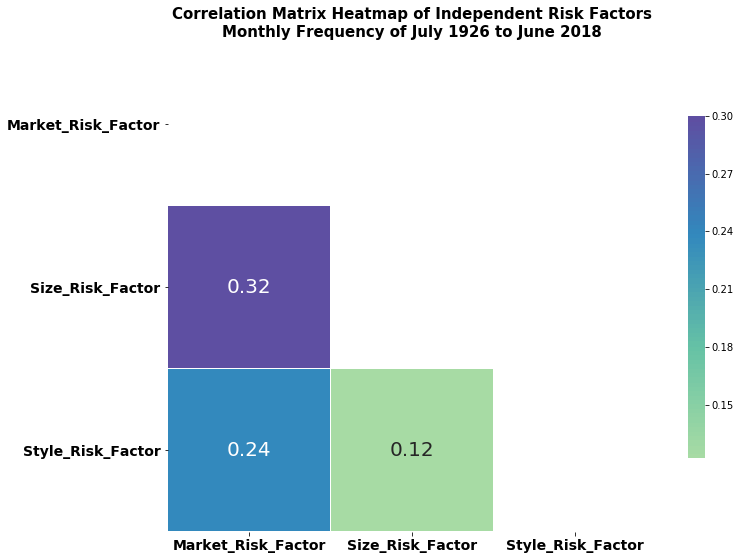

In [35]:
# Generate a correlation matrix function and assign it
corr = df_independent_factors.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title('Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018'
          , fontweight='bold', fontsize=15,color='k')

# Another Visual of the 3 Independent Risk Factors Below

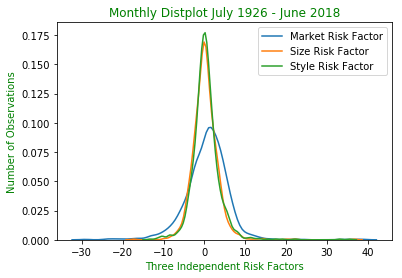

In [36]:
sns.distplot(market_return,label='Market Risk Factor',hist=False)
sns.distplot(small_vs_big,label='Size Risk Factor',hist=False)
sns.distplot(value_vs_growth, label='Style Risk Factor',hist=False)
plt.xlabel('Three Independent Risk Factors',color='green')
plt.ylabel('Number of Observations',color='green')
plt.title('Monthly Distplot July 1926 - June 2018', color='green')
plt.legend()

# Subset of 6 Portfolio Returns or Dependent Variables

In [37]:
six = [small_growth_excess_return, small_neutral_excess_return, small_value_excess_return, large_growth_excess_return, large_neutral_excess_return, large_value_excess_return]

df_six = pd.DataFrame(data=six)

df_six.reset_index()

df_dependent_factors = df_six.transpose()

df_dependent_factors.rename (columns={'SMALL LoBM-RF' : 'Small_Growth'}, inplace=True)

df_dependent_factors.rename (columns={'ME1 BM2-RF' : 'Small_Neutral'}, inplace=True)

df_dependent_factors.rename (columns={'SMALL HiBM-RF' : 'Small_Value'}, inplace=True)

df_dependent_factors.rename (columns={'BIG LoBM-RF' : 'Large_Growth'}, inplace=True)

df_dependent_factors.rename (columns={'ME2 BM2-RF' : 'Large_Neutral'}, inplace=True)

df_dependent_factors.rename (columns={'BIG HiBM-RF' : 'Large_Value'}, inplace=True)

df_dependent_factors.describe()

,Small_Growth,Small_Neutral,Small_Value,Large_Growth,Large_Neutral,Large_Value
count,1104.000,1104.000,1104.000,1104.000,1104.000,1104.000
mean,0.717,0.987,1.193,0.646,0.687,0.917
std,7.510,6.961,8.127,5.286,5.653,7.120
min,-32.969,-30.082,-33.859,-28.897,-28.179,-35.143
25%,-3.272,-2.134,-2.314,-2.031,-1.873,-2.245
50%,0.976,1.227,1.280,0.993,0.935,1.109
75%,4.742,4.320,4.598,3.588,3.200,4.088
max,59.898,62.157,83.545,33.639,51.793,67.755


# Correlation Matrix of Portfolios

Similar return behavior of the six portfolios provides an overall view of the nature of the U.S. Stock Market Returns as the figures below are closer to one.  As no segment can be isolated to demonstrate class imbalance.

Text(0.5,1,'Correlation Matrix Heatmap of Six Portfolios\nMonthly Frequency of July 1926 to June 2018')

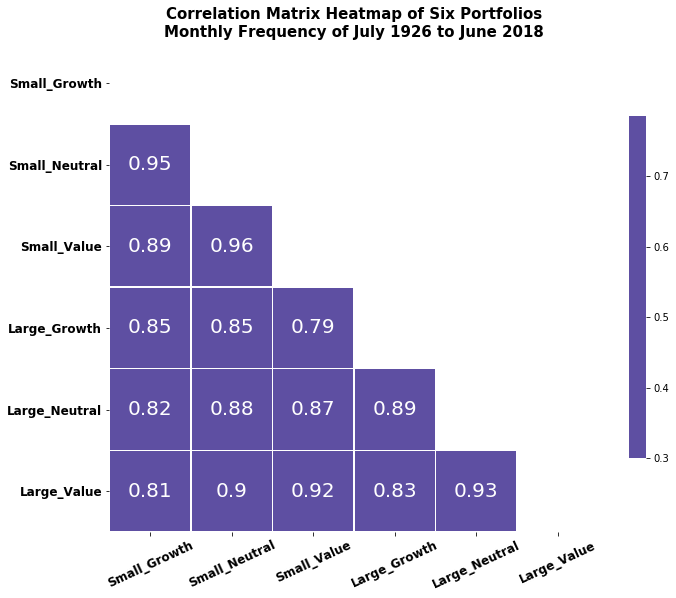

In [38]:
# Generate a correlation matrix function and assign it
corr = df_dependent_factors.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=12)
plt.xticks(rotation=25,fontweight='bold', fontsize=12)
plt.title('Correlation Matrix Heatmap of Six Portfolios\nMonthly Frequency of July 1926 to June 2018'
          , fontweight='bold', fontsize=15,color='k')

# Running the Regressions below . . .

Now that we provided the features of the U.S. Stock Market let's the multiple linear regression against the sizes of small and large across the styles of value, neutral and growth.

In [39]:
regr = linear_model.LinearRegression()
Y_sg = df['SMALL LoBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_sg)

print(Fore.RED + "\nSmall Growth Portfolio Excess Return on 3 Factors")
print('\nCoefficients: ', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared:', regr.score(X, Y_sg))

small_growth_coeffs = regr.coef_
small_growth_alpha = regr.intercept_
small_growth_rsqrd = regr.score(X, Y_sg)


Small Growth Portfolio Excess Return on 3 Factors

Coefficients:  [ 1.08845865  1.03733551 -0.19204224]

Intercept:  -0.15607637648846318

R-squared: 0.9747660850232415


In [40]:
regr = linear_model.LinearRegression()
Y_sn = df['ME1 BM2-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_sn)

print(Fore.GREEN + '\n\tSmall Neutral Portfolio Excess Return on 3 Factors')
print('\n\tCoefficients: ', regr.coef_)
print('\n\tIntercept: ', regr.intercept_)
print('\n\tR-squared:',  regr.score(X, Y_sn))


small_neutral_coeffs = regr.coef_
small_neutral_alpha = regr.intercept_
small_neutral_rsqrd = regr.score(X, Y_sn)


	Small Neutral Portfolio Excess Return on 3 Factors

	Coefficients:  [0.98371966 0.81945716 0.29526846]

	Intercept:  0.04864523246355379

	R-squared: 0.978069909822615


In [41]:
regr = linear_model.LinearRegression()
Y_sv = df['SMALL HiBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_sv)

print(Fore.BLUE + '\n\t\tSmall Value Portfolio Excess Return on 3 Factors')
print('\n\t\tCoefficients: ', regr.coef_)
print('\n\t\tIntercept: ', regr.intercept_)
print('\n\t\tR-squared:', regr.score(X, Y_sv))

small_value_coeffs = regr.coef_
small_value_alpha = regr.intercept_
small_value_rsqrd = regr.score(X, Y_sv)


		Small Value Portfolio Excess Return on 3 Factors

		Coefficients:  [1.02339806 0.92902604 0.78638082]

		Intercept:  0.021218161850596662

		R-squared: 0.9921284459293503


In [42]:
regr = linear_model.LinearRegression()
Y_lg = df['BIG LoBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_lg)

print(Fore.BLACK + '\nLarge Growth Portfolio Excess Return on 3 Factors')
print('\nCoefficients: ', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared:', regr.score(X, Y_lg))

large_growth_coeffs = regr.coef_
large_growth_alpha = regr.intercept_
large_growth_rsqrd = regr.score(X, Y_lg)


Large Growth Portfolio Excess Return on 3 Factors

Coefficients:  [ 1.02221942 -0.0919116  -0.22922249]

Intercept:  0.07479212176192906

R-squared: 0.9811419118782503


In [43]:
regr = linear_model.LinearRegression()
Y_ln = df['ME2 BM2-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_ln)

print(Fore.MAGENTA + '\n\tLarge Neutral Portfolio Excess Return on 3 Factors')
print('\n\tCoefficients: ', regr.coef_)
print('\n\tIntercept: ', regr.intercept_)
print('\n\tR-squared:', regr.score(X, Y_ln))

large_neutral_coeffs = regr.coef_
large_neutral_alpha = regr.intercept_
large_neutral_rsqrd = regr.score(X, Y_ln)


	Large Neutral Portfolio Excess Return on 3 Factors

	Coefficients:  [ 0.98611766 -0.13876716  0.32642338]

	Intercept:  -0.05836561347473246

	R-squared: 0.9508277054882855


In [44]:
regr = linear_model.LinearRegression()
Y_lv = df['BIG HiBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y_lv)

print(Fore.YELLOW + '\n\t\tLarge Value Portfolio Excess Return on 3 Factors')
print('\n\t\tCoefficients: ', regr.coef_)
print('\n\t\tIntercept: ', regr.intercept_)
print('\n\t\tR-squared:', regr.score(X, Y_lv))

large_value_coeffs = regr.coef_
large_value_alpha = regr.intercept_
large_value_rsqrd = regr.score(X, Y_lv)


		Large Value Portfolio Excess Return on 3 Factors

		Coefficients:  [1.08727363 0.01648414 0.7924494 ]

		Intercept:  -0.10269597287521437

		R-squared: 0.9686486651506865


# Interpreting the results

All of the R - Squared are near one so almost all of the variance in the portfolio returns, in the y variable, are explanied by the independent variables, x. Too many parameters in the Fama French 3 Factor Model could be overfitting because we are fitting the noise rather than the signal of the U.S. stock market.

In [47]:
small_growth_rsqrd, small_neutral_rsqrd, small_value_rsqrd,large_growth_rsqrd, large_neutral_rsqrd, large_value_rsqrd

(0.9747660850232415,
 0.978069909822615,
 0.9921284459293503,
 0.9811419118782503,
 0.9508277054882855,
 0.9686486651506865)

In [48]:
# Alphas
small_growth_alpha, small_neutral_alpha, small_value_alpha,large_growth_alpha, large_neutral_alpha, large_value_alpha

(-0.15607637648846318,
 0.04864523246355379,
 0.021218161850596662,
 0.07479212176192906,
 -0.05836561347473246,
 -0.10269597287521437)

In [49]:
# Coefficients
small_growth_coeffs, small_neutral_coeffs, small_value_coeffs,large_growth_coeffs, large_neutral_coeffs, large_value_coeffs

(array([ 1.08845865,  1.03733551, -0.19204224]),
 array([0.98371966, 0.81945716, 0.29526846]),
 array([1.02339806, 0.92902604, 0.78638082]),
 array([ 1.02221942, -0.0919116 , -0.22922249]),
 array([ 0.98611766, -0.13876716,  0.32642338]),
 array([1.08727363, 0.01648414, 0.7924494 ]))

# Addressing Overfitting with In Sample 20% Evaluation

In [64]:
# Assign the estimator of the cross validation model as a linear regression
clf = linear_model.LinearRegression()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_sg, test_size=0.2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, Y_sn, test_size=0.2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, Y_sv, test_size=0.2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, Y_lg, test_size=0.2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, Y_ln, test_size=0.2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, Y_lv, test_size=0.2, random_state=20)

print(Fore.RED + 'With 20% Holdout on Small Growth: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample on Small Growth: ' + str(clf.fit(X, Y_sg).score(X, Y_sg))+'\n')

print(Fore.GREEN + '\tWith 20% Holdout on Small Neutral: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('\tTesting on Sample on Small Neutral: ' + str(clf.fit(X, Y_sn).score(X, Y_sn))+'\n')

print(Fore.BLUE + '\t\tWith 20% Holdout on Small Value: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('\t\tTesting on Sample on Small Value: ' + str(clf.fit(X, Y_sv).score(X, Y_sv))+'\n')

print(Fore.BLACK + 'With 20% Holdout on Large Growth: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample on Large Growth: ' + str(clf.fit(X, Y_lg).score(X, Y_lg))+'\n')

print(Fore.MAGENTA + '\tWith 20% Holdout on Large Neutral: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('\tTesting on Sample on Large Neutral: ' + str(clf.fit(X, Y_ln).score(X, Y_ln))+'\n')

print(Fore.YELLOW + '\t\tWith 20% Holdout on Large Value: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('\t\tTesting on Sample on Large Value: ' + str(clf.fit(X, Y_lv).score(X, Y_lv))+'\n')

With 20% Holdout on Small Growth: 0.9591055249494521
Testing on Sample on Small Growth: 0.9747660850232415

	With 20% Holdout on Small Neutral: 0.9591055249494521
	Testing on Sample on Small Neutral: 0.978069909822615

		With 20% Holdout on Small Value: 0.9591055249494521
		Testing on Sample on Small Value: 0.9921284459293503

With 20% Holdout on Large Growth: 0.9591055249494521
Testing on Sample on Large Growth: 0.9811419118782503

	With 20% Holdout on Large Neutral: 0.9591055249494521
	Testing on Sample on Large Neutral: 0.9508277054882855

		With 20% Holdout on Large Value: 0.9591055249494521
		Testing on Sample on Large Value: 0.9686486651506865



In [66]:
# Small Growth Excess Return Portfolio
cv_sg = cross_val_score(clf, X, Y_sg, cv=10)
print (cv_sg)

# Small Neutral Excess Return Portfolio
cv_sn = cross_val_score(clf, X, Y_sn, cv=10)
print(cv_sn)

# Small Value Excess Return Portfolio
cv_sv = cross_val_score(clf, X, Y_sv, cv=10)
print (cv_sv)

# Large Growth Excess Return Portfolio
cv_lg = cross_val_score(clf, X, Y_lg, cv=10)
print (cv_lg)

# Large Neutral Excess Return Portfolio
cv_ln = cross_val_score(clf, X, Y_ln, cv=10)
print (cv_ln)

# Large Value Excess Return Portfolio
cv_lv = cross_val_score(clf, X, Y_lv, cv=10)
print (cv_lv)

[0.96709667 0.98038695 0.96945061 0.96000365 0.98571941 0.98024473
 0.97987619 0.97890909 0.97033362 0.95826845]
[0.97729039 0.97922107 0.97745222 0.97831483 0.98742789 0.9886765
 0.98855554 0.96312485 0.92398258 0.98430107]
[0.99099757 0.99556656 0.99307461 0.9923301  0.98893832 0.98795777
 0.9788298  0.97771542 0.98558682 0.98782009]
[0.98544716 0.98662195 0.98102967 0.98654743 0.95786234 0.97128295
 0.97868443 0.9617401  0.97163087 0.97881675]
[0.9594247  0.96127495 0.94379865 0.91255693 0.91598128 0.92280651
 0.96444719 0.88259505 0.87380614 0.94450084]
[0.97825133 0.9698974  0.9780371  0.95609973 0.95199731 0.96129197
 0.96098346 0.93791543 0.94047251 0.94446586]


In [67]:
# Throw the cross validation results into a dataframe for visualization
cv = [cv_sg,cv_sn,cv_sv,cv_lg,cv_ln,cv_lv]
df_cv = pd.DataFrame(data=cv)

[[Text(0,0,'Small Growth'),
  Text(0,0,'Small Neutral'),
  Text(0,0,'Small Value'),
  Text(0,0,'Large Growth'),
  Text(0,0,'Large Neutral'),
  Text(0,0,'Large Value')]]

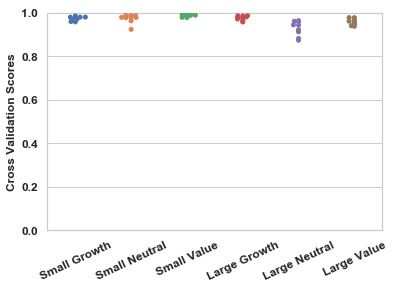

In [75]:
sns.set(style="whitegrid")
cvs = sns.swarmplot(data=cv, orient='v')
plt.ylim(0.0, 1.0)
plt.yticks(fontweight='bold',fontsize=12)
plt.xticks(rotation=25,fontweight='bold', fontsize=12)
plt.ylabel("Cross Validation Scores",fontweight='bold')
cvs.set(xticklabels=["Small Growth","Small Neutral","Small Value","Large Growth","Large Neutral","Large Value"])

# There is no class imbalance as all outcomes are near equal